In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, structural_similarity

Загрузка изображения

In [3]:
image = cv2.imread('assets/sar_1_gray.jpg')

if image is None:
    print("Ошибка: не удалось загрузить изображение!")
else:
    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image

print("Изображение успешно загружено!")
print(f"Размер изображения: {image_gray.shape}")

Изображение успешно загружено!
Размер изображения: (400, 600)


Функция гамма-коррекции и сравнения изображений

In [4]:
def gamma_correction(image, gamma):
    image_normalized = image.astype(np.float32) / 255.0
    corrected = np.power(image_normalized, gamma)
    return (corrected * 255).astype(np.uint8)

def compare_images(img1, img2, title):
    mse = mean_squared_error(img1, img2)
    ssim = structural_similarity(img1, img2)
    print(f"{title}: MSE = {mse:.4f}, SSIM = {ssim:.4f}")
    return mse, ssim

Применение гамма-коррекции

In [5]:
gamma_low = 0.5
image_gamma_low = gamma_correction(image_gray, gamma_low)

gamma_high = 2.0
image_gamma_high = gamma_correction(image_gray, gamma_high)

Визуализация результатов гамма-коррекции

In [6]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Исходное изображение

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

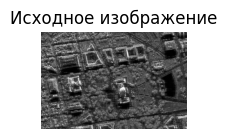

In [7]:
plt.subplot(231)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

Гамма < 1

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

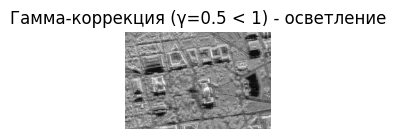

In [8]:
plt.subplot(232)
plt.imshow(image_gamma_low, cmap='gray')
plt.title(f'Гамма-коррекция (γ={gamma_low} < 1) - осветление')
plt.axis('off')

Гамма > 1

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

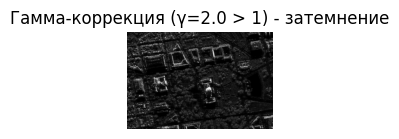

In [9]:
plt.subplot(233)
plt.imshow(image_gamma_high, cmap='gray')
plt.title(f'Гамма-коррекция (γ={gamma_high} > 1) - затемнение')
plt.axis('off')

Гистограмма исходного изображения

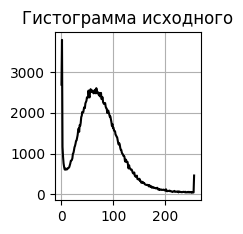

In [10]:
plt.subplot(234)
hist_orig = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
plt.plot(hist_orig, color='black')
plt.title('Гистограмма исходного')
plt.grid(True)

Гистограмма гамма < 1

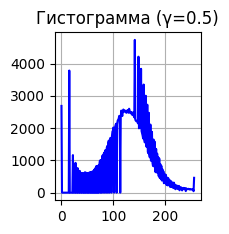

In [11]:
plt.subplot(235)
hist_low = cv2.calcHist([image_gamma_low], [0], None, [256], [0, 256])
plt.plot(hist_low, color='blue')
plt.title(f'Гистограмма (γ={gamma_low})')
plt.grid(True)

Гистограмма гамма > 1

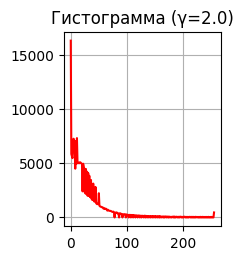

In [12]:
plt.subplot(236)
hist_high = cv2.calcHist([image_gamma_high], [0], None, [256], [0, 256])
plt.plot(hist_high, color='red')
plt.title(f'Гистограмма (γ={gamma_high})')
plt.grid(True)

plt.tight_layout()
plt.show()

Сравнение изображений с помощью метрик

In [13]:
print("Сравнение с исходным изображением:")

(ssim_low, diff_low) = structural_similarity(image_gray, image_gamma_low, full=True)
diff_low = (diff_low * 255).astype("uint8")
mse_low = mean_squared_error(image_gray, image_gamma_low)
print(f"Для гамма <1: MSE = {mse_low:.4f}, SSIM = {ssim_low:.4f}")

(ssim_high, diff_high) = structural_similarity(image_gray, image_gamma_high, full=True)
diff_high = (diff_high * 255).astype("uint8")
mse_high = mean_squared_error(image_gray, image_gamma_high)
print(f"Для гамма >1: MSE = {mse_high:.4f}, SSIM = {ssim_high:.4f}")

Сравнение с исходным изображением:
Для гамма <1: MSE = 3250.4291, SSIM = 0.7875
Для гамма >1: MSE = 2383.7636, SSIM = 0.5270


Статистическая коррекция (выравнивание гистограммы)

In [14]:
mean = image_gray.mean()
std = image_gray.std()
print(f"Исходное: mean={mean:.2f}, std={std:.2f}")

eq_gray = cv2.equalizeHist(image_gray)
mean_eq = eq_gray.mean()
std_eq = eq_gray.std()
print(f"Выравненное: mean={mean_eq:.2f}, std={std_eq:.2f}")

Исходное: mean=74.94, std=43.66
Выравненное: mean=127.03, std=74.27


Визуализация выравнивания гистограммы

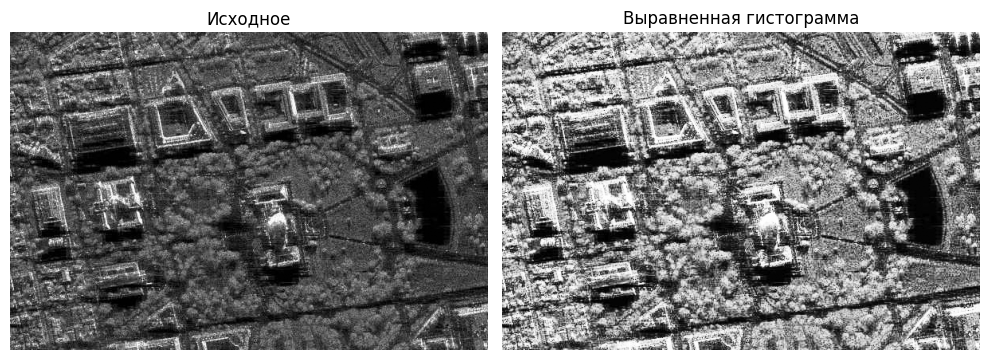

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image_gray, cmap="gray")
plt.title('Исходное')
plt.axis('off')

plt.subplot(122)
plt.imshow(eq_gray, cmap="gray")
plt.title('Выравненная гистограмма')
plt.axis('off')

plt.tight_layout()
plt.show()

Пороговая фильтрация


Порог = 100:
  THRESH_BINARY: 55653 пикселей выше порога (23.2%)
  THRESH_BINARY_INV: 184347 пикселей выше порога (76.8%)
  THRESH_TRUNC: 237311 пикселей выше порога (98.9%)
  THRESH_TOZERO: 55653 пикселей выше порога (23.2%)
  THRESH_TOZERO_INV: 181658 пикселей выше порога (75.7%)


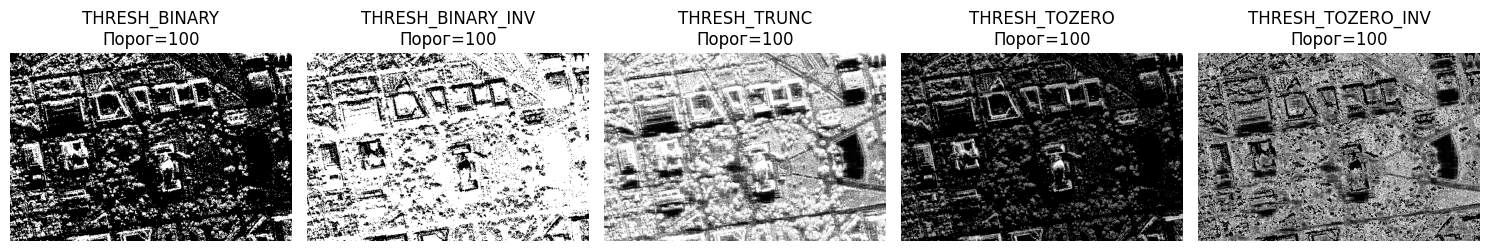


Порог = 150:
  THRESH_BINARY: 13083 пикселей выше порога (5.5%)
  THRESH_BINARY_INV: 226917 пикселей выше порога (94.5%)
  THRESH_TRUNC: 237311 пикселей выше порога (98.9%)
  THRESH_TOZERO: 13083 пикселей выше порога (5.5%)
  THRESH_TOZERO_INV: 224228 пикселей выше порога (93.4%)


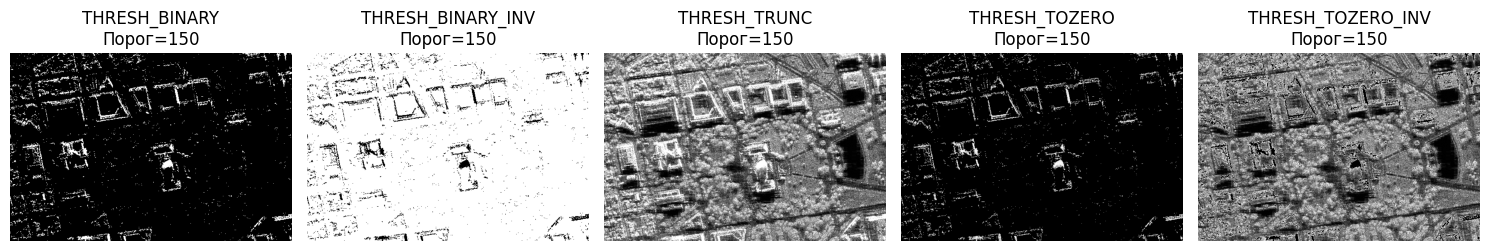


Порог = 200:
  THRESH_BINARY: 3830 пикселей выше порога (1.6%)
  THRESH_BINARY_INV: 236170 пикселей выше порога (98.4%)
  THRESH_TRUNC: 237311 пикселей выше порога (98.9%)
  THRESH_TOZERO: 3830 пикселей выше порога (1.6%)
  THRESH_TOZERO_INV: 233481 пикселей выше порога (97.3%)


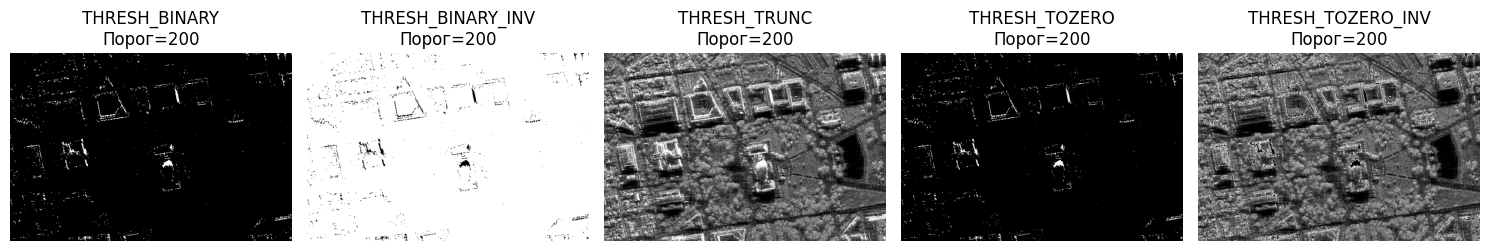

In [16]:
thresholds = [100, 150, 200]
methods = [
    ('THRESH_BINARY', cv2.THRESH_BINARY),
    ('THRESH_BINARY_INV', cv2.THRESH_BINARY_INV),
    ('THRESH_TRUNC', cv2.THRESH_TRUNC),
    ('THRESH_TOZERO', cv2.THRESH_TOZERO),
    ('THRESH_TOZERO_INV', cv2.THRESH_TOZERO_INV)
]

for threshold in thresholds:
    print(f"\nПорог = {threshold}:")
    plt.figure(figsize=(15, 3))

    for i, (method_name, method) in enumerate(methods, 1):
        _, thresh = cv2.threshold(image_gray, threshold, 255, method)
        above_threshold = np.sum(thresh > 0)
        total_pixels = thresh.size
        percentage = (above_threshold / total_pixels) * 100

        print(f"  {method_name}: {above_threshold} пикселей выше порога ({percentage:.1f}%)")

        plt.subplot(1, 5, i)
        plt.imshow(thresh, cmap='gray')
        plt.title(f'{method_name}\nПорог={threshold}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()